# Trabalho de Estatística II

    - Professores:

- Alex Lima <br>
- Marcos de Paula <br>
- Maurício Sobrinho <br>

    - Integrantes do grupo:
    
- Diullio Pereira Dos Santos
- Luis Felipe Costa
- Olga Georgios Alexopoulos
- Roosevelt da Rocha Chaves Junior
- Victor Augusto Roudino

1. Entender o problema (objetivo): Através do Dataset e da análise de RFV (Recência, Frequência e Valor) dos clientes HyperaPharma prever os valores futuros de compra. 

2. Entender os dados

    - Descrever as colunas 

        * Rede: Cliente
        * UF: Estado
        * BU: Unidade de Negócio
        * BU New: "Subdivisão" da unidade de negócio 
        * Canal VD-VI-Hosp: Canal de distribuição
        * Entregue - Liq Abatimento: Valor faturado entregue ao cliente
        * Qtd Entregue: Unidades (cx)
        

    - Quantas colunas numéricas (quantitativas) e quantas categóricas (qualitativas)? Classifique
      
        * Rede: Qualitativa nominal
        * UF: Qualitativa nominal
        * BU: Qualitativa nominal
        * BU New: Qualitativa nominal 
        * Canal VD-VI-Hosp: Qualitativa nominal
        * Ano: Qualitativa ordinal
        * Trimestre: Qualitativa ordinal
        * Mês: Qualitativa ordinal
        * Entregue - Liq Abatimento: Quantitativa continua
        * Qtd Entregue:  Quantitativa continua

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("rfv_analise.xlsx")

In [4]:
bu = pd.read_csv("bu.csv")

In [5]:
bu

,BU,BU New,BU-RFV
0,Adoçantes,CONSUMER HEALTH,CH
1,GENÉRICOS,SMART GENERICS,GENÉRICOS
2,MARCAS,CONSUMER HEALTH,CH
3,MARCAS,FAMILIA BUSCO,CH
4,MARCAS,PRESCRIPTION PRODUCTS,PP
5,MARCAS,SANOFI CH,CH
6,MARCAS,SANOFI PP,PP
7,MARCAS,SKINCARE,SKINCARE
8,MARCAS,TAKEDA CH,CH
9,MARCAS,TAKEDA PP,PP


In [6]:
df["BU"].unique()

array(['Adoçantes', 'GENÉRICOS', 'MARCAS', 'SMART'], dtype=object)

In [7]:
df["BU New"].unique()

array(['CONSUMER HEALTH', 'SMART GENERICS', 'FAMILIA BUSCO',
       'INSTITUCIONAL', 'PRESCRIPTION PRODUCTS', 'SANOFI CH', 'SANOFI PP',
       'SKINCARE', 'TAKEDA CH', 'TAKEDA PP'], dtype=object)

In [8]:
df['BU-TESTE'] = df['BU'] + ' - ' + df['BU New']

In [9]:
bu['BU-TESTE'] = bu['BU'] + ' - ' + bu['BU New']

In [10]:
df.tail(1)

,Rede,UF,BU,BU New,Canal VD-VI-Hosp,Ano,Trimestre,Mês,Entregue - Liq Abatimento,Qtd Entregue,BU-TESTE
85801,CIRURGICA MONTEBELLO LTDA,PE,SMART,SMART GENERICS,HOSPITALAR,2022,4 TRIMESTRE,DEZEMBRO,0.0,0.0,SMART - SMART GENERICS


In [11]:
bu.tail(1)

,BU,BU New,BU-RFV,BU-TESTE
13,MARCAS,INSTITUCIONAL,PP,MARCAS - INSTITUCIONAL


In [12]:
df["BU_DATA"] = df["BU-TESTE"].map(bu.set_index("BU-TESTE")["BU-RFV"])

In [13]:
df.tail(1)

,Rede,UF,BU,BU New,Canal VD-VI-Hosp,Ano,Trimestre,Mês,Entregue - Liq Abatimento,Qtd Entregue,BU-TESTE,BU_DATA
85801,CIRURGICA MONTEBELLO LTDA,PE,SMART,SMART GENERICS,HOSPITALAR,2022,4 TRIMESTRE,DEZEMBRO,0.0,0.0,SMART - SMART GENERICS,SMART


In [14]:
df['rede_uf'] = df['Rede'] + ' - ' + df['UF']

In [15]:
df = df[df["Qtd Entregue"] > 0]

In [16]:
df.tail(1)

,Rede,UF,BU,BU New,Canal VD-VI-Hosp,Ano,Trimestre,Mês,Entregue - Liq Abatimento,Qtd Entregue,BU-TESTE,BU_DATA,rede_uf
85717,CIAMED DIST DE MED LTDA,RS,GENÉRICOS,SMART GENERICS,HOSPITALAR,2018,3 TRIMESTRE,JULHO,275.0,100.0,GENÉRICOS - SMART GENERICS,GENÉRICOS,CIAMED DIST DE MED LTDA - RS


In [17]:
df = df.drop(["Rede", "UF", "BU", "BU New", ], axis=1)

In [18]:
df.tail(1)

,Canal VD-VI-Hosp,Ano,Trimestre,Mês,Entregue - Liq Abatimento,Qtd Entregue,BU-TESTE,BU_DATA,rede_uf
85717,HOSPITALAR,2018,3 TRIMESTRE,JULHO,275.0,100.0,GENÉRICOS - SMART GENERICS,GENÉRICOS,CIAMED DIST DE MED LTDA - RS


In [19]:
meses = {'JANEIRO': '01', 'FEVEREIRO': '02', 'MARÇO': '03', 'ABRIL': '04',
         'MAIO': '05', 'JUNHO': '06', 'JULHO': '07', 'AGOSTO': '08',
         'SETEMBRO': '09', 'OUTUBRO': '10', 'NOVEMBRO': '11', 'DEZEMBRO': '12'}
df['mes_numero'] = df['Mês'].map(meses)


In [20]:
df

,Canal VD-VI-Hosp,Ano,Trimestre,Mês,Entregue - Liq Abatimento,Qtd Entregue,BU-TESTE,BU_DATA,rede_uf,mes_numero
3,VAREJO DIRETO,2018,2 TRIMESTRE,MAIO,5386.33,64.0,Adoçantes - CONSUMER HEALTH,CH,DROGASIL - BA,05
4,VAREJO DIRETO,2018,2 TRIMESTRE,JUNHO,25947.19,352.0,Adoçantes - CONSUMER HEALTH,CH,DROGASIL - BA,06
5,VAREJO DIRETO,2018,3 TRIMESTRE,JULHO,17637.59,232.0,Adoçantes - CONSUMER HEALTH,CH,DROGASIL - BA,07
6,VAREJO DIRETO,2018,3 TRIMESTRE,AGOSTO,13165.35,191.0,Adoçantes - CONSUMER HEALTH,CH,DROGASIL - BA,08
7,VAREJO DIRETO,2018,3 TRIMESTRE,SETEMBRO,56266.59,818.0,Adoçantes - CONSUMER HEALTH,CH,DROGASIL - BA,09
...,...,...,...,...,...,...,...,...,...,...
85696,HOSPITALAR,2018,3 TRIMESTRE,JULHO,1110.12,72.0,SMART - SMART GENERICS,SMART,ALTHIS COM DE MEDIC E MAT MEDICO - SC,07
85700,VAREJO DIRETO,2018,2 TRIMESTRE,JUNHO,1726.44,60.0,MARCAS - CONSUMER HEALTH,CH,GLOBAL ORGANIZACAO FARMACEUTICA - SP,06
85712,VAREJO INDIRETO,2018,2 TRIMESTRE,MAIO,702.00,300.0,SMART - SMART GENERICS,SMART,DISTRIPHARMA DISTR DE MEDIC LTDA - RS,05
85716,HOSPITALAR,2018,2 TRIMESTRE,JUNHO,275.00,100.0,GENÉRICOS - SMART GENERICS,GENÉRICOS,CIAMED DIST DE MED LTDA - RS,06


In [21]:
df['data'] = pd.to_datetime(df['Ano'].astype(str) + '-' + df['mes_numero'], format="%Y-%m")

In [22]:
df.tail(1)

,Canal VD-VI-Hosp,Ano,Trimestre,Mês,Entregue - Liq Abatimento,Qtd Entregue,BU-TESTE,BU_DATA,rede_uf,mes_numero,data
85717,HOSPITALAR,2018,3 TRIMESTRE,JULHO,275.0,100.0,GENÉRICOS - SMART GENERICS,GENÉRICOS,CIAMED DIST DE MED LTDA - RS,07,2018-07-01


In [23]:
df = df.drop(["Ano", "Trimestre", "Mês"], axis=1)

In [24]:
df = df.drop(["mes_numero", "BU-TESTE"], axis=1)

In [25]:
df.tail(1)

,Canal VD-VI-Hosp,Entregue - Liq Abatimento,Qtd Entregue,BU_DATA,rede_uf,data
85717,HOSPITALAR,275.0,100.0,GENÉRICOS,CIAMED DIST DE MED LTDA - RS,2018-07-01


In [26]:
df["Canal VD-VI-Hosp"].unique()

array(['VAREJO DIRETO', 'VAREJO INDIRETO', 'ALIMENTAR', 'HOSPITALAR',
       'E-COMMERCE'], dtype=object)

In [27]:
contagem = df["Canal VD-VI-Hosp"].value_counts()
contagem

Canal VD-VI-Hosp
VAREJO INDIRETO    35226
VAREJO DIRETO      18110
ALIMENTAR          10086
HOSPITALAR          6965
E-COMMERCE           275
Name: count, dtype: int64

In [28]:
percentual = (contagem/len(df)) * 100
percentual

Canal VD-VI-Hosp
VAREJO INDIRETO    49.851405
VAREJO DIRETO      25.629051
ALIMENTAR          14.273584
HOSPITALAR          9.856783
E-COMMERCE          0.389177
Name: count, dtype: float64

In [29]:
df = df.loc[df["Canal VD-VI-Hosp"] != "E-COMMERCE"]
df.tail(1)

,Canal VD-VI-Hosp,Entregue - Liq Abatimento,Qtd Entregue,BU_DATA,rede_uf,data
85717,HOSPITALAR,275.0,100.0,GENÉRICOS,CIAMED DIST DE MED LTDA - RS,2018-07-01


In [30]:
df["Canal VD-VI-Hosp"].unique()

array(['VAREJO DIRETO', 'VAREJO INDIRETO', 'ALIMENTAR', 'HOSPITALAR'],
      dtype=object)

frequencia = df["rede_uf"].value_counts() - OK
recencia = ultima compra - OK
valor

In [31]:
ultima_compra = df.groupby("rede_uf")["data"].max().reset_index()

In [32]:
ultima_compra = ultima_compra.rename(columns={'data': 'recencia'})

In [33]:
ultima_compra.tail(5)

,rede_uf,recencia
746,WAL MART - SP,2022-12-01
747,WM COMERCIO DE MEDICAMENTOS LTDA - PR,2021-04-01
748,WN COMERCIO IMP E REP LTDA - AM,2020-07-01
749,ZAMBONI COMERCIAL LTDA - MG,2019-04-01
750,ZAMBONI COMERCIAL LTDA - RJ,2021-02-01


In [34]:
df = pd.merge(df, ultima_compra, on = "rede_uf", how = "left")

In [35]:
df.tail(5)

,Canal VD-VI-Hosp,Entregue - Liq Abatimento,Qtd Entregue,BU_DATA,rede_uf,data,recencia
70382,HOSPITALAR,1110.12,72.0,SMART,ALTHIS COM DE MEDIC E MAT MEDICO - SC,2018-07-01,2018-07-01
70383,VAREJO DIRETO,1726.44,60.0,CH,GLOBAL ORGANIZACAO FARMACEUTICA - SP,2018-06-01,2018-06-01
70384,VAREJO INDIRETO,702.00,300.0,SMART,DISTRIPHARMA DISTR DE MEDIC LTDA - RS,2018-05-01,2018-05-01
70385,HOSPITALAR,275.00,100.0,GENÉRICOS,CIAMED DIST DE MED LTDA - RS,2018-06-01,2018-07-01
70386,HOSPITALAR,275.00,100.0,GENÉRICOS,CIAMED DIST DE MED LTDA - RS,2018-07-01,2018-07-01


Setamos a data maxima como a data de referencia para o calculo de recencia

In [36]:
data_maxima = df['data'].max()
data_maxima

Timestamp('2022-12-01 00:00:00')

In [37]:
df["recencia_valor"] = (data_maxima - df["recencia"]).dt.days

In [38]:
df["recencia_valor"] = df["recencia_valor"] / 30

In [39]:
df.tail(5)

,Canal VD-VI-Hosp,Entregue - Liq Abatimento,Qtd Entregue,BU_DATA,rede_uf,data,recencia,recencia_valor
70382,HOSPITALAR,1110.12,72.0,SMART,ALTHIS COM DE MEDIC E MAT MEDICO - SC,2018-07-01,2018-07-01,53.800000
70383,VAREJO DIRETO,1726.44,60.0,CH,GLOBAL ORGANIZACAO FARMACEUTICA - SP,2018-06-01,2018-06-01,54.800000
70384,VAREJO INDIRETO,702.00,300.0,SMART,DISTRIPHARMA DISTR DE MEDIC LTDA - RS,2018-05-01,2018-05-01,55.833333
70385,HOSPITALAR,275.00,100.0,GENÉRICOS,CIAMED DIST DE MED LTDA - RS,2018-06-01,2018-07-01,53.800000
70386,HOSPITALAR,275.00,100.0,GENÉRICOS,CIAMED DIST DE MED LTDA - RS,2018-07-01,2018-07-01,53.800000


In [40]:
df = df.drop("recencia", axis=1)

In [41]:
df.tail(1)

,Canal VD-VI-Hosp,Entregue - Liq Abatimento,Qtd Entregue,BU_DATA,rede_uf,data,recencia_valor
70386,HOSPITALAR,275.0,100.0,GENÉRICOS,CIAMED DIST DE MED LTDA - RS,2018-07-01,53.8


In [42]:
df['frequencia'] = df.groupby('rede_uf')['rede_uf'].transform('count')

In [43]:
df.tail(5)

,Canal VD-VI-Hosp,Entregue - Liq Abatimento,Qtd Entregue,BU_DATA,rede_uf,data,recencia_valor,frequencia
70382,HOSPITALAR,1110.12,72.0,SMART,ALTHIS COM DE MEDIC E MAT MEDICO - SC,2018-07-01,53.800000,5
70383,VAREJO DIRETO,1726.44,60.0,CH,GLOBAL ORGANIZACAO FARMACEUTICA - SP,2018-06-01,54.800000,1
70384,VAREJO INDIRETO,702.00,300.0,SMART,DISTRIPHARMA DISTR DE MEDIC LTDA - RS,2018-05-01,55.833333,1
70385,HOSPITALAR,275.00,100.0,GENÉRICOS,CIAMED DIST DE MED LTDA - RS,2018-06-01,53.800000,2
70386,HOSPITALAR,275.00,100.0,GENÉRICOS,CIAMED DIST DE MED LTDA - RS,2018-07-01,53.800000,2


In [44]:
df["valor"] = df["Entregue - Liq Abatimento"]

In [45]:
df

,Canal VD-VI-Hosp,Entregue - Liq Abatimento,Qtd Entregue,BU_DATA,rede_uf,data,recencia_valor,frequencia,valor
0,VAREJO DIRETO,5386.33,64.0,CH,DROGASIL - BA,2018-05-01,0.000000,431,5386.33
1,VAREJO DIRETO,25947.19,352.0,CH,DROGASIL - BA,2018-06-01,0.000000,431,25947.19
2,VAREJO DIRETO,17637.59,232.0,CH,DROGASIL - BA,2018-07-01,0.000000,431,17637.59
3,VAREJO DIRETO,13165.35,191.0,CH,DROGASIL - BA,2018-08-01,0.000000,431,13165.35
4,VAREJO DIRETO,56266.59,818.0,CH,DROGASIL - BA,2018-09-01,0.000000,431,56266.59
...,...,...,...,...,...,...,...,...,...
70382,HOSPITALAR,1110.12,72.0,SMART,ALTHIS COM DE MEDIC E MAT MEDICO - SC,2018-07-01,53.800000,5,1110.12
70383,VAREJO DIRETO,1726.44,60.0,CH,GLOBAL ORGANIZACAO FARMACEUTICA - SP,2018-06-01,54.800000,1,1726.44
70384,VAREJO INDIRETO,702.00,300.0,SMART,DISTRIPHARMA DISTR DE MEDIC LTDA - RS,2018-05-01,55.833333,1,702.00
70385,HOSPITALAR,275.00,100.0,GENÉRICOS,CIAMED DIST DE MED LTDA - RS,2018-06-01,53.800000,2,275.00


In [46]:
df = df.drop(["Entregue - Liq Abatimento","Qtd Entregue"], axis=1)

In [47]:
df = df.rename(columns={'Canal VD-VI-Hosp': 'canal'})

In [48]:
df

,canal,BU_DATA,rede_uf,data,recencia_valor,frequencia,valor
0,VAREJO DIRETO,CH,DROGASIL - BA,2018-05-01,0.000000,431,5386.33
1,VAREJO DIRETO,CH,DROGASIL - BA,2018-06-01,0.000000,431,25947.19
2,VAREJO DIRETO,CH,DROGASIL - BA,2018-07-01,0.000000,431,17637.59
3,VAREJO DIRETO,CH,DROGASIL - BA,2018-08-01,0.000000,431,13165.35
4,VAREJO DIRETO,CH,DROGASIL - BA,2018-09-01,0.000000,431,56266.59
...,...,...,...,...,...,...,...
70382,HOSPITALAR,SMART,ALTHIS COM DE MEDIC E MAT MEDICO - SC,2018-07-01,53.800000,5,1110.12
70383,VAREJO DIRETO,CH,GLOBAL ORGANIZACAO FARMACEUTICA - SP,2018-06-01,54.800000,1,1726.44
70384,VAREJO INDIRETO,SMART,DISTRIPHARMA DISTR DE MEDIC LTDA - RS,2018-05-01,55.833333,1,702.00
70385,HOSPITALAR,GENÉRICOS,CIAMED DIST DE MED LTDA - RS,2018-06-01,53.800000,2,275.00


In [49]:
colunas_data = ["canal","BU_DATA","rede_uf","data","recencia_valor","frequencia","valor"]

In [50]:
df_data = df[colunas_data]

In [51]:
df_data

,canal,BU_DATA,rede_uf,data,recencia_valor,frequencia,valor
0,VAREJO DIRETO,CH,DROGASIL - BA,2018-05-01,0.000000,431,5386.33
1,VAREJO DIRETO,CH,DROGASIL - BA,2018-06-01,0.000000,431,25947.19
2,VAREJO DIRETO,CH,DROGASIL - BA,2018-07-01,0.000000,431,17637.59
3,VAREJO DIRETO,CH,DROGASIL - BA,2018-08-01,0.000000,431,13165.35
4,VAREJO DIRETO,CH,DROGASIL - BA,2018-09-01,0.000000,431,56266.59
...,...,...,...,...,...,...,...
70382,HOSPITALAR,SMART,ALTHIS COM DE MEDIC E MAT MEDICO - SC,2018-07-01,53.800000,5,1110.12
70383,VAREJO DIRETO,CH,GLOBAL ORGANIZACAO FARMACEUTICA - SP,2018-06-01,54.800000,1,1726.44
70384,VAREJO INDIRETO,SMART,DISTRIPHARMA DISTR DE MEDIC LTDA - RS,2018-05-01,55.833333,1,702.00
70385,HOSPITALAR,GENÉRICOS,CIAMED DIST DE MED LTDA - RS,2018-06-01,53.800000,2,275.00


In [54]:
df = df.drop("data", axis=1)

In [55]:
df = df.groupby(['canal', 'BU_DATA', 'rede_uf']).agg({
    'recencia_valor': 'max',
    'frequencia': 'max',
    'valor': 'sum'
}).reset_index()


In [56]:
df

,canal,BU_DATA,rede_uf,recencia_valor,frequencia,valor
0,ALIMENTAR,CH,A A AFONSO E CIA LTDA - SP,34.466667,5,14975.80
1,ALIMENTAR,CH,A ANGELONI E CIA LTDA - SC,0.000000,54,2030695.29
2,ALIMENTAR,CH,A C D A IMPORTACAO E EXPORT LTDA - AC,0.000000,22,252453.42
3,ALIMENTAR,CH,A C D A IMPORTACAO E EXPORT LTDA - RO,0.000000,17,80297.19
4,ALIMENTAR,CH,A FEIRITA DISTRIBUIDORA DE PRODUTOS - BA,0.000000,30,5306879.83
...,...,...,...,...,...,...
1804,VAREJO INDIRETO,SMART,UNIMED CUIABA COOPERATIVA TRAB - MT,0.000000,219,21971.16
1805,VAREJO INDIRETO,SMART,V E V COMERCIO DE MEDICAMENTOS - PR,2.033333,26,16105349.66
1806,VAREJO INDIRETO,SMART,VIPFAR DISTRIBUIDORA FARMACEUTICA E - BA,41.633333,14,2920187.72
1807,VAREJO INDIRETO,SMART,W M DE CASTRO NETO PROD FARM EPP - SP,38.566667,48,2535089.33


In [57]:
df.isnull().sum()

canal             0
BU_DATA           0
rede_uf           0
recencia_valor    0
frequencia        0
valor             0
dtype: int64

In [58]:
df["valor/qtd"] = df["valor"]/df["frequencia"]

In [59]:
df = df.drop("valor", axis=1)

In [63]:
df

,canal,BU_DATA,rede_uf,recencia_valor,frequencia,valor/qtd
0,ALIMENTAR,CH,A A AFONSO E CIA LTDA - SP,34.466667,5,2995.160000
1,ALIMENTAR,CH,A ANGELONI E CIA LTDA - SC,0.000000,54,37605.468333
2,ALIMENTAR,CH,A C D A IMPORTACAO E EXPORT LTDA - AC,0.000000,22,11475.155455
3,ALIMENTAR,CH,A C D A IMPORTACAO E EXPORT LTDA - RO,0.000000,17,4723.364118
4,ALIMENTAR,CH,A FEIRITA DISTRIBUIDORA DE PRODUTOS - BA,0.000000,30,176895.994333
...,...,...,...,...,...,...
1804,VAREJO INDIRETO,SMART,UNIMED CUIABA COOPERATIVA TRAB - MT,0.000000,219,100.324932
1805,VAREJO INDIRETO,SMART,V E V COMERCIO DE MEDICAMENTOS - PR,2.033333,26,619436.525385
1806,VAREJO INDIRETO,SMART,VIPFAR DISTRIBUIDORA FARMACEUTICA E - BA,41.633333,14,208584.837143
1807,VAREJO INDIRETO,SMART,W M DE CASTRO NETO PROD FARM EPP - SP,38.566667,48,52814.361042


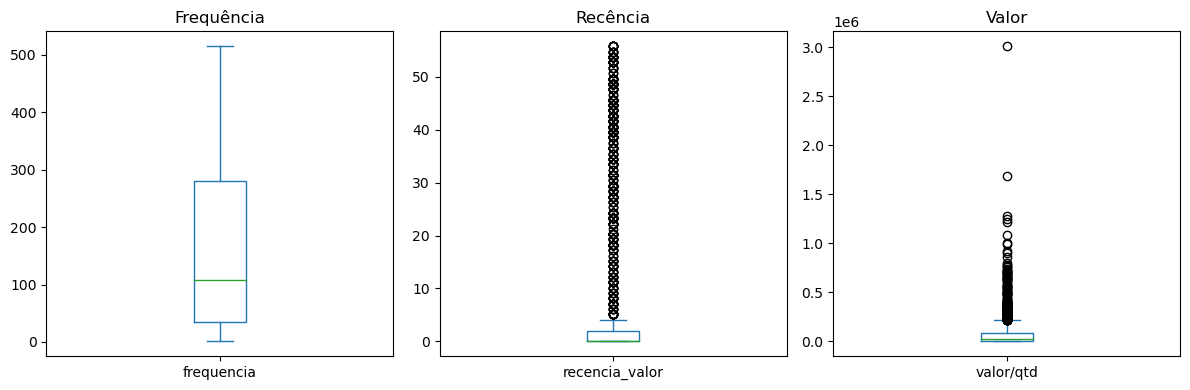

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

df['frequencia'].plot.box(ax=axes[0])
df['recencia_valor'].plot.box(ax=axes[1])
df['valor/qtd'].plot.box(ax=axes[2])

axes[0].set_title('Frequência')
axes[1].set_title('Recência')
axes[2].set_title('Valor')

plt.tight_layout()
plt.show()

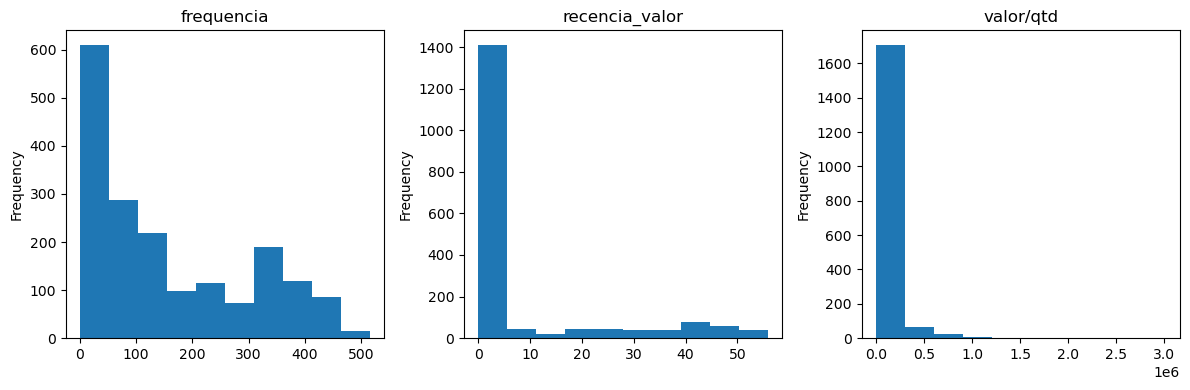

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

df['frequencia'].plot.hist(ax=axes[0])
df['recencia_valor'].plot.hist(ax=axes[1])
df['valor/qtd'].plot.hist(ax=axes[2])

axes[0].set_title('frequencia')
axes[1].set_title('recencia_valor')
axes[2].set_title('valor/qtd')

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [67]:
df = df.reset_index()

In [68]:
df

,index,canal,BU_DATA,rede_uf,recencia_valor,frequencia,valor/qtd
0,0,ALIMENTAR,CH,A A AFONSO E CIA LTDA - SP,34.466667,5,2995.160000
1,1,ALIMENTAR,CH,A ANGELONI E CIA LTDA - SC,0.000000,54,37605.468333
2,2,ALIMENTAR,CH,A C D A IMPORTACAO E EXPORT LTDA - AC,0.000000,22,11475.155455
3,3,ALIMENTAR,CH,A C D A IMPORTACAO E EXPORT LTDA - RO,0.000000,17,4723.364118
4,4,ALIMENTAR,CH,A FEIRITA DISTRIBUIDORA DE PRODUTOS - BA,0.000000,30,176895.994333
...,...,...,...,...,...,...,...
1804,1804,VAREJO INDIRETO,SMART,UNIMED CUIABA COOPERATIVA TRAB - MT,0.000000,219,100.324932
1805,1805,VAREJO INDIRETO,SMART,V E V COMERCIO DE MEDICAMENTOS - PR,2.033333,26,619436.525385
1806,1806,VAREJO INDIRETO,SMART,VIPFAR DISTRIBUIDORA FARMACEUTICA E - BA,41.633333,14,208584.837143
1807,1807,VAREJO INDIRETO,SMART,W M DE CASTRO NETO PROD FARM EPP - SP,38.566667,48,52814.361042


C:\Users\diullio.santos\AppData\Local\Temp\ipykernel_11452\2647430680.py:5: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='index', y='frequencia', data=df, ax=axes[0])
C:\Users\diullio.santos\AppData\Local\Temp\ipykernel_11452\2647430680.py:6: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='index', y='recencia_valor', data=df, ax=axes[1])
C:\Users\diullio.santos\AppData\Local\Temp\ipykernel_11452\2647430680.py:7: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='index', y='valor/qtd', data=df, ax=axes[2])


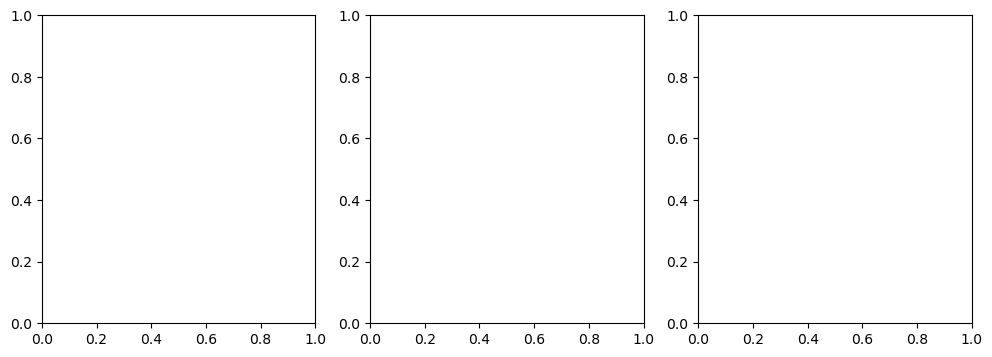

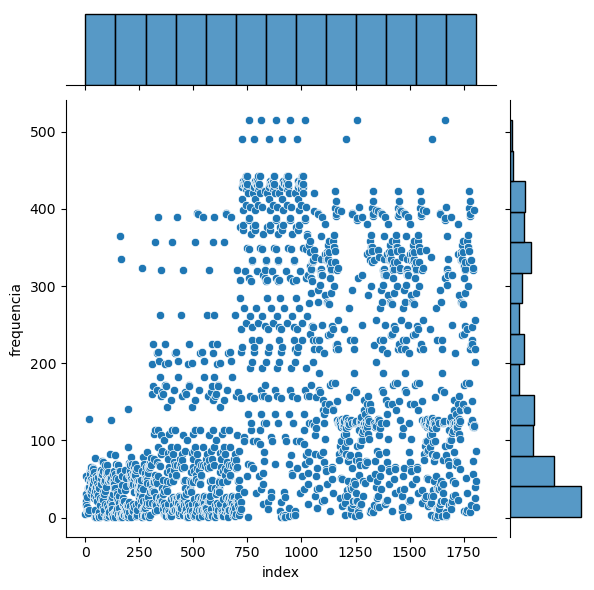

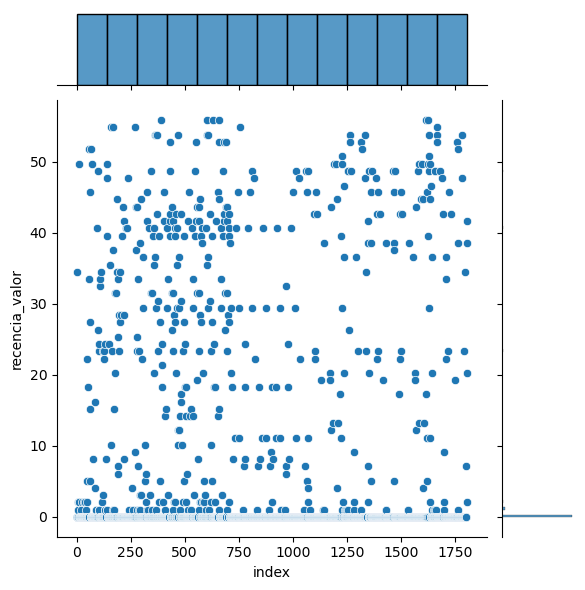

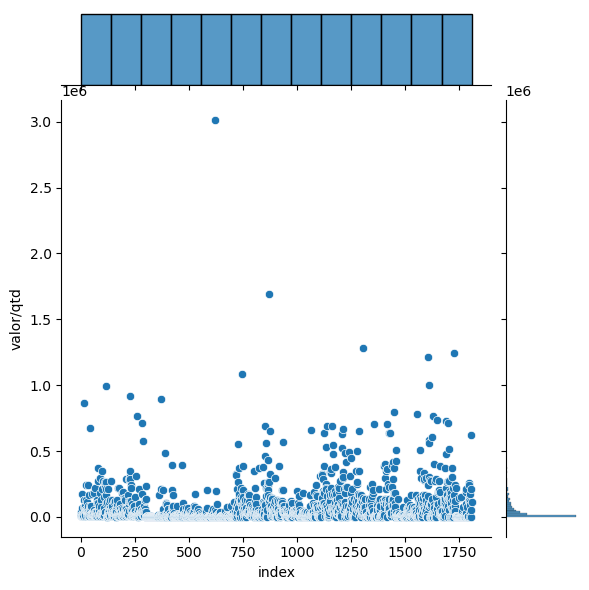

In [70]:
# Criando a figura e os eixos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Gerando os gráficos de joinplot em cada eixo
sns.jointplot(x='index', y='frequencia', data=df, ax=axes[0])
sns.jointplot(x='index', y='recencia_valor', data=df, ax=axes[1])
sns.jointplot(x='index', y='valor/qtd', data=df, ax=axes[2])

# Exibindo o gráfico
plt.show()

In [71]:
df.loc[df['valor/qtd'].idxmax()]

index                               619
canal                        HOSPITALAR
BU_DATA                           SMART
rede_uf           CM HOSPITALAR SA - DF
recencia_valor                      0.0
frequencia                           46
valor/qtd                3011926.086957
Name: 619, dtype: object

In [72]:
maiores_valores = df.nlargest(5, 'valor/qtd')
maiores_valores.loc[:, ['rede_uf', 'valor/qtd']]

,rede_uf,valor/qtd
619,CM HOSPITALAR SA - DF,3.011926e+06
871,DROGASIL - SP,1.690460e+06
1307,ORIENTE - MG,1.280790e+06
1728,ORIENTE - MG,1.245262e+06
1606,DISLAB GO COMERCIAL FARMACEUTICA - GO,1.212695e+06


In [73]:
df["LogValor"] = np.log10(df["valor/qtd"])

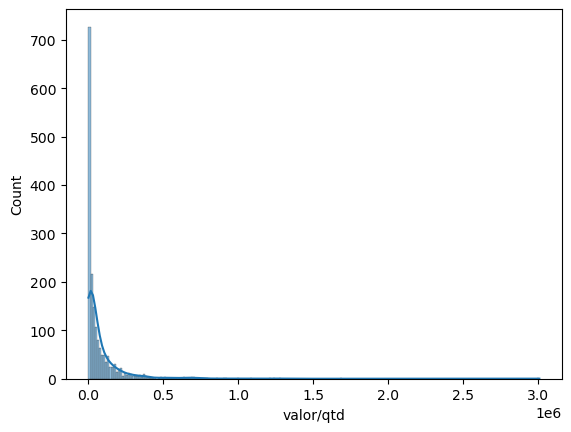

In [74]:
sns.histplot(data=df, x='valor/qtd', kde=True )
plt.show()

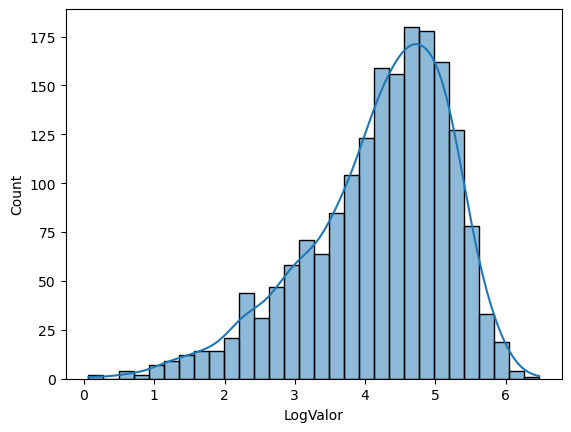

In [75]:
sns.histplot(data=df, x='LogValor', kde=True )
plt.show()

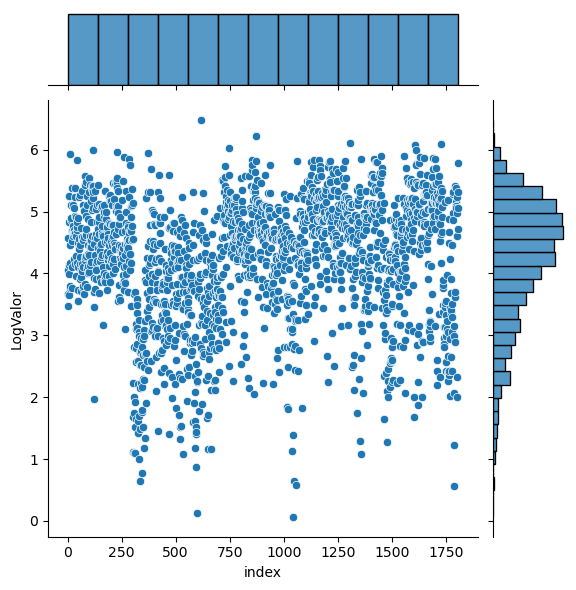

In [76]:
sns.jointplot(data=df, x='index', y='LogValor')
plt.show()

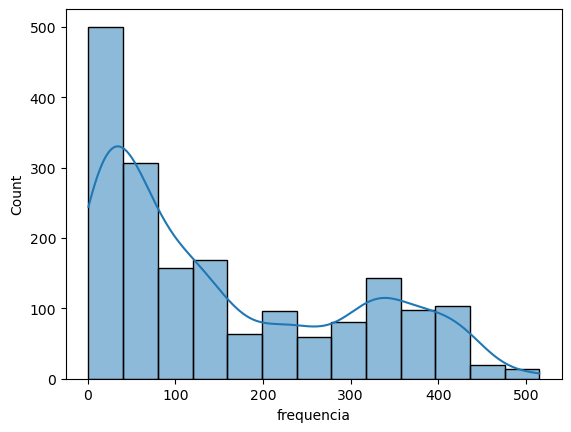

In [77]:
sns.histplot(data=df, x='frequencia', kde=True )
plt.show()

In [78]:
df["LogRecencia"] = np.log10(df["recencia_valor"])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


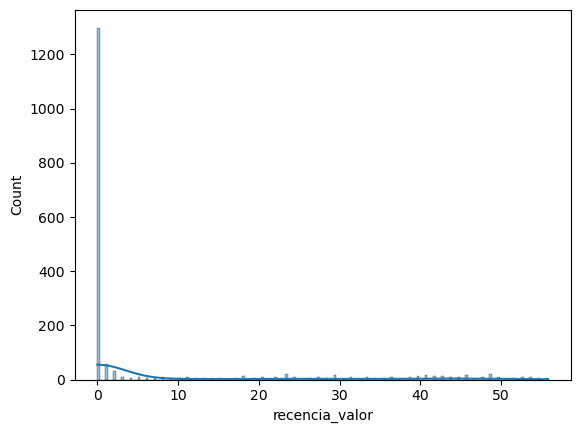

In [80]:
sns.histplot(data=df, x='recencia_valor', kde=True )
plt.show()

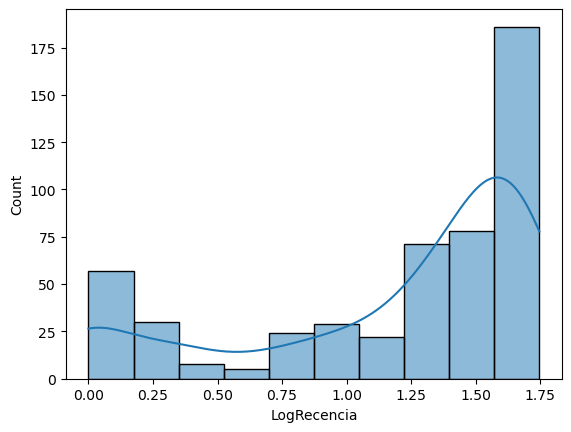

In [79]:
sns.histplot(data=df, x='LogRecencia', kde=True )
plt.show()

In [81]:
df = df.drop(["recencia_valor", "valor/qtd"], axis=1)

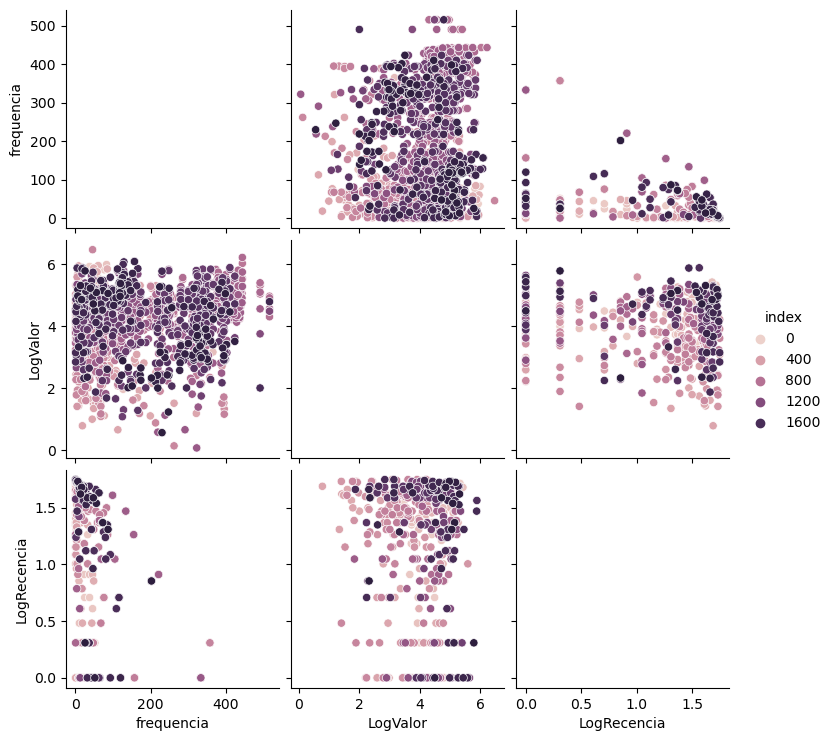

In [82]:
sns.pairplot(df, hue='index')
plt.show()

In [83]:
df

,index,canal,BU_DATA,rede_uf,frequencia,LogValor,LogRecencia
0,0,ALIMENTAR,CH,A A AFONSO E CIA LTDA - SP,5,3.476420,1.537399
1,1,ALIMENTAR,CH,A ANGELONI E CIA LTDA - SC,54,4.575251,-inf
2,2,ALIMENTAR,CH,A C D A IMPORTACAO E EXPORT LTDA - AC,22,4.059759,-inf
3,3,ALIMENTAR,CH,A C D A IMPORTACAO E EXPORT LTDA - RO,17,3.674251,-inf
4,4,ALIMENTAR,CH,A FEIRITA DISTRIBUIDORA DE PRODUTOS - BA,30,5.247718,-inf
...,...,...,...,...,...,...,...
1804,1804,VAREJO INDIRETO,SMART,UNIMED CUIABA COOPERATIVA TRAB - MT,219,2.001409,-inf
1805,1805,VAREJO INDIRETO,SMART,V E V COMERCIO DE MEDICAMENTOS - PR,26,5.791997,0.308209
1806,1806,VAREJO INDIRETO,SMART,VIPFAR DISTRIBUIDORA FARMACEUTICA E - BA,14,5.319283,1.619441
1807,1807,VAREJO INDIRETO,SMART,W M DE CASTRO NETO PROD FARM EPP - SP,48,4.722752,1.586212


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


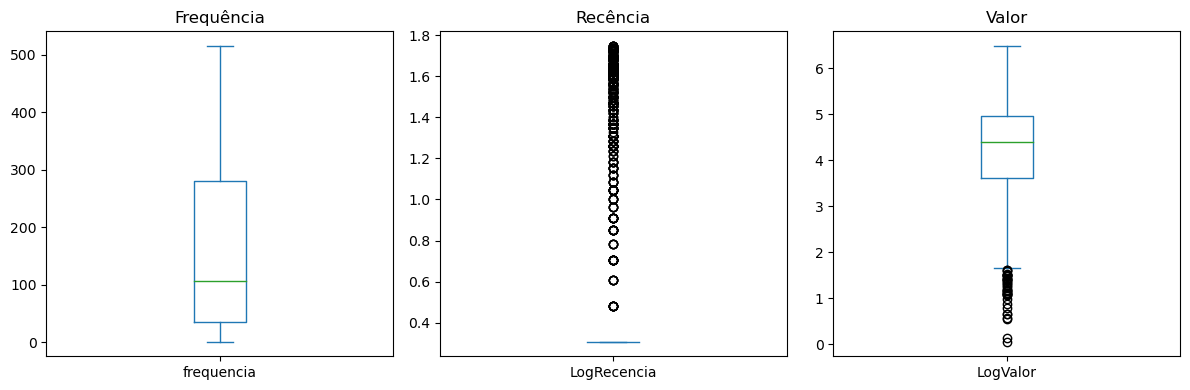

In [85]:
# Criando a figura e os eixos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

df['frequencia'].plot.box(ax=axes[0])
df['LogRecencia'].plot.box(ax=axes[1])
df['LogValor'].plot.box(ax=axes[2])

axes[0].set_title('Frequência')
axes[1].set_title('Recência')
axes[2].set_title('Valor')

plt.tight_layout()
plt.show()

In [86]:
df_encoded = df.copy()

In [87]:
df_encoded = df_encoded.drop("index", axis=1)

In [88]:
df_encoded = df_encoded.reset_index()

In [89]:
df_encoded

,index,canal,BU_DATA,rede_uf,frequencia,LogValor,LogRecencia
0,0,ALIMENTAR,CH,A A AFONSO E CIA LTDA - SP,5,3.476420,1.537399
1,1,ALIMENTAR,CH,A ANGELONI E CIA LTDA - SC,54,4.575251,-inf
2,2,ALIMENTAR,CH,A C D A IMPORTACAO E EXPORT LTDA - AC,22,4.059759,-inf
3,3,ALIMENTAR,CH,A C D A IMPORTACAO E EXPORT LTDA - RO,17,3.674251,-inf
4,4,ALIMENTAR,CH,A FEIRITA DISTRIBUIDORA DE PRODUTOS - BA,30,5.247718,-inf
...,...,...,...,...,...,...,...
1804,1804,VAREJO INDIRETO,SMART,UNIMED CUIABA COOPERATIVA TRAB - MT,219,2.001409,-inf
1805,1805,VAREJO INDIRETO,SMART,V E V COMERCIO DE MEDICAMENTOS - PR,26,5.791997,0.308209
1806,1806,VAREJO INDIRETO,SMART,VIPFAR DISTRIBUIDORA FARMACEUTICA E - BA,14,5.319283,1.619441
1807,1807,VAREJO INDIRETO,SMART,W M DE CASTRO NETO PROD FARM EPP - SP,48,4.722752,1.586212


In [90]:
df_encoded = df_encoded.drop(["canal", "BU_DATA", "rede_uf"], axis=1)

In [91]:
df_final = df_encoded.copy()

In [92]:
df_final['LogRecencia'] = df_final['LogRecencia'].replace(-np.inf, 0)

In [93]:
df_final

,index,frequencia,LogValor,LogRecencia
0,0,5,3.476420,1.537399
1,1,54,4.575251,0.000000
2,2,22,4.059759,0.000000
3,3,17,3.674251,0.000000
4,4,30,5.247718,0.000000
...,...,...,...,...
1804,1804,219,2.001409,0.000000
1805,1805,26,5.791997,0.308209
1806,1806,14,5.319283,1.619441
1807,1807,48,4.722752,1.586212


In [94]:
df_final.describe()

,index,frequencia,LogValor,LogRecencia
count,1809.000000,1809.000000,1809.000000,1809.000000
mean,904.000000,154.598121,4.190471,0.335654
std,522.357636,140.812408,1.026984,0.615205
min,0.000000,1.000000,0.064644,0.000000
25%,452.000000,35.000000,3.619698,0.000000
50%,904.000000,107.000000,4.394416,0.000000
75%,1356.000000,280.000000,4.952182,0.308209
max,1808.000000,515.000000,6.478844,1.746894


In [95]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [97]:
df_cluster_normalizado = scaler.fit_transform(df_final) # Normalizar os dados

In [98]:
df_cluster_normalizado

array([[-1.73109361, -1.06268679, -0.69548132,  1.95394619],
       [-1.72917868, -0.71460987,  0.37477367, -0.54574862],
       [-1.72726376, -0.94192541, -0.12731296, -0.54574862],
       ...,
       [ 1.72726376, -0.99875429,  1.09945625,  2.08734011],
       [ 1.72917868, -0.75723153,  0.51843881,  2.03331214],
       [ 1.73109361, -0.48019072,  0.84827828,  1.58014092]])

In [99]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_cluster_normalizado)

KMeans(n_clusters=3, random_state=42)

In [100]:
labels = kmeans.labels_

In [101]:
df_final['Cluster'] = labels

In [102]:
df_final['Cluster'].unique()

array([0, 2, 1])

In [103]:
df_final.tail(1)

,index,frequencia,LogValor,LogRecencia,Cluster
1808,1808,87,5.061398,1.307496,0


In [104]:
from mpl_toolkits.mplot3d import Axes3D

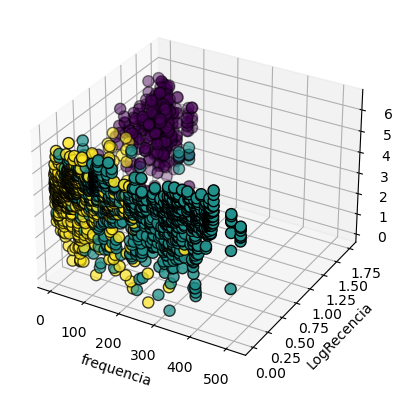

In [105]:
# Configurando a figura e os eixos 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Gerando o gráfico scatter 3D

ax.scatter(df_final['frequencia'], df_final['LogRecencia'], df_final['LogValor'], c=df_final['Cluster'], s=64, edgecolors='k', cmap='viridis')
# Configurando os rótulos dos eixos
ax.set_xlabel('frequencia')
ax.set_ylabel('LogRecencia')
ax.set_zlabel('LogValor')

# Exibindo o gráfico
plt.show()

##### alterei a frequencia para soma visto que somaremos todos valores e todas compras independente do cliente, apenas considerando o mes a mes para a regressao

In [153]:
df_data_cluster = df_data.groupby(['data']).agg({
    'recencia_valor': 'max',
    'frequencia': 'sum',
    'valor': 'sum'
}).reset_index()

In [154]:
df_data_cluster

,data,recencia_valor,frequencia,valor
0,2018-03-01,47.666667,24902,1.591844e+07
1,2018-05-01,55.833333,179891,1.288620e+08
2,2018-06-01,54.800000,254951,6.126726e+08
3,2018-07-01,53.800000,228705,1.756039e+08
4,2018-08-01,52.766667,230615,2.843466e+08
5,2018-09-01,51.733333,251480,6.100156e+08
6,2018-10-01,50.733333,215388,1.246710e+08
7,2018-11-01,49.700000,251555,2.772950e+08
8,2018-12-01,48.700000,266702,6.789409e+08
9,2019-01-01,47.666667,188844,7.541487e+07


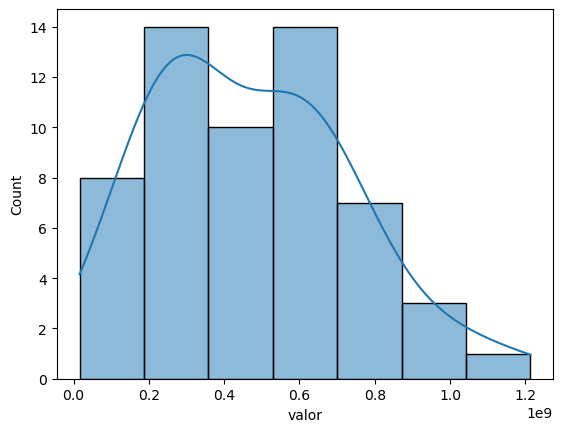

In [155]:
sns.histplot(data=df_data_cluster, x='valor', kde=True )
plt.show()

In [156]:
df_data_cluster["LogValor"] = np.log10(df_data_cluster["valor"])

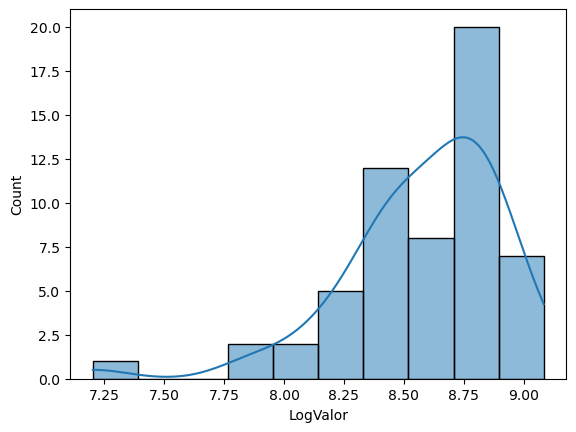

In [157]:
sns.histplot(data=df_data_cluster, x='LogValor', kde=True )
plt.show()

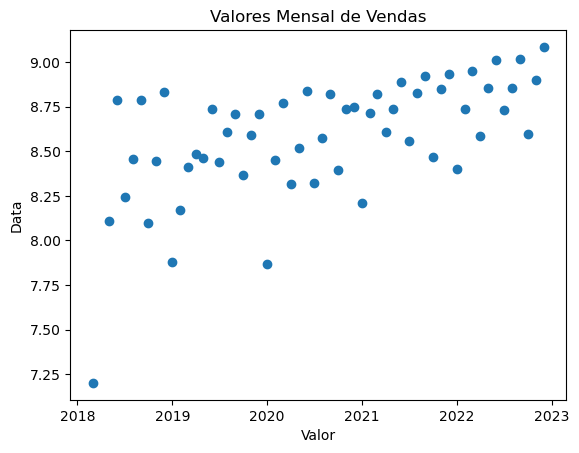

In [158]:
# Criando a figura e os eixos
plt.scatter(x = df_data_cluster['data'], y= df_data_cluster['LogValor'])
plt.ylabel('Data')
plt.xlabel('Valor')
plt.title('Valores Mensal de Vendas')
plt.show()

In [159]:
df_data_cluster.reset_index()

,index,data,recencia_valor,frequencia,valor,LogValor
0,0,2018-03-01,47.666667,24902,1.591844e+07,7.201901
1,1,2018-05-01,55.833333,179891,1.288620e+08,8.110125
2,2,2018-06-01,54.800000,254951,6.126726e+08,8.787228
3,3,2018-07-01,53.800000,228705,1.756039e+08,8.244534
4,4,2018-08-01,52.766667,230615,2.843466e+08,8.453848
5,5,2018-09-01,51.733333,251480,6.100156e+08,8.785341
6,6,2018-10-01,50.733333,215388,1.246710e+08,8.095765
7,7,2018-11-01,49.700000,251555,2.772950e+08,8.442942
8,8,2018-12-01,48.700000,266702,6.789409e+08,8.831832
9,9,2019-01-01,47.666667,188844,7.541487e+07,7.877457


In [160]:
df_data_cluster['ano'] = df_data_cluster['data'].dt.year


In [161]:
df_data_cluster['mes'] = df_data_cluster['data'].dt.month

In [162]:
df_data_cluster.tail(1)


,data,recencia_valor,frequencia,valor,LogValor,ano,mes
56,2022-12-01,0.0,405100,1.213469e+09,9.084029,2022,12


In [163]:
df_data_cluster.tail(1)

,data,recencia_valor,frequencia,valor,LogValor,ano,mes
56,2022-12-01,0.0,405100,1.213469e+09,9.084029,2022,12


In [186]:
df_data_cluster["LogRecencia"] = np.log10(df_data_cluster["recencia_valor"])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [189]:
df_data_cluster['LogRecencia'] = df_data_cluster['LogRecencia'].replace(-np.inf, 0)

In [190]:
df_data_cluster.tail(1)

,data,recencia_valor,frequencia,valor,LogValor,ano,mes,LogRecencia
56,2022-12-01,0.0,405100,1.213469e+09,9.084029,2022,12,0.0


In [192]:
df_data_cluster = df_data_cluster.drop(["recencia_valor","valor","data"], axis=1)

In [193]:
correlacao = df_data_cluster.corr(method='spearman')
correlacao

,frequencia,LogValor,ano,mes,LogRecencia
frequencia,1.000000,0.779557,0.785409,0.280383,-0.827678
LogValor,0.779557,1.000000,0.527081,0.362494,-0.587069
ano,0.785409,0.527081,1.000000,-0.094639,-0.978988
mes,0.280383,0.362494,-0.094639,1.000000,-0.093643
LogRecencia,-0.827678,-0.587069,-0.978988,-0.093643,1.000000


In [194]:
corr_abs = correlacao['LogValor'].abs().sort_values(ascending=False)
corr_abs

LogValor       1.000000
frequencia     0.779557
LogRecencia    0.587069
ano            0.527081
mes            0.362494
Name: LogValor, dtype: float64

In [195]:
corr_abs[corr_abs>0.5]

LogValor       1.000000
frequencia     0.779557
LogRecencia    0.587069
ano            0.527081
Name: LogValor, dtype: float64

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [198]:
X = df_data_cluster[['ano', "LogRecencia", "frequencia"]]
y = df_data_cluster['LogValor']

In [199]:
# Divide os dados em treino teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria e ajusta o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Avalia a performance do modelo usando os dados de teste
score = modelo.score(X_test, y_test)
print(f"R² Score: {score}")

R² Score: 0.779802882415065


In [200]:
y_pred = modelo.predict(X_test)
y_pred

array([7.65452466, 8.62032198, 8.56823932, 8.53758986, 8.60154932,
       8.75538616, 8.3659802 , 8.6165012 , 8.54730399, 8.53747265,
       8.64411657, 8.52525567])

In [201]:
#Calcula o erro absoluto
err_abs = mean_absolute_error(y_test, y_pred)
err_abs

0.17311247315055978

In [202]:
mse = mean_squared_error(y_test, y_pred)
mse

0.042847037159305164

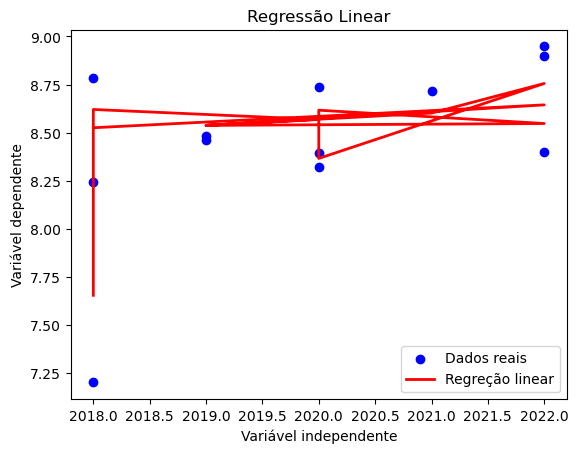

In [207]:
plt.scatter(X_test["ano"], y_test, color='blue', label='Dados reais')  # Pontos com os dados reais
plt.plot(X_test["ano"], y_pred, color='red', linewidth=2, label='Regreção linear')  # Linha da regressão linear
plt.xlabel('Variável independente')
plt.ylabel('Variável dependente')
plt.title("Regressão Linear")
plt.legend()
plt.show()

In [208]:
df_data_cluster.tail(1)

,frequencia,LogValor,ano,mes,LogRecencia
56,405100,9.084029,2022,12,0.0


In [209]:
def polynomial_regression(X, y, degrees):
    # Divide os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    results = []  # Lista para armazenar os resultados
    
    for degree in degrees:
        # Aplica o polynomialfeatures para as variáveis independentes
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)
        
        # Cria e ajusta o modelo de regressão polinomial
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # Avalia a performance do modelo usando os dados de teste
        score = model.score(X_test_poly, y_test)
        
        # Armazena os graus e os scores
        results.append((degree, score))
        
    return results


# Define as variáveis independentes (X) e a variável dependente resposta (y)
X = df_data_cluster[['ano', 'frequencia', "LogRecencia"]]
y = df_data_cluster['LogValor']

# Defineos graus que serão considerados
degrees = range(2, 11)

# Retorna o resultado da regressão polinomial para cada grau
results = polynomial_regression(X, y, degrees)

# Print dos resultados: Grau e R2 Score
for degree, score in results:
    print(f"Degree {degree}: R² Score = {score}")


Degree 2: R² Score = -0.12078932483254223
Degree 3: R² Score = -11.09420764307249
Degree 4: R² Score = -58.310099830788054
Degree 5: R² Score = -2043.4542503670305
Degree 6: R² Score = -252.199167731066
Degree 7: R² Score = -43.967231449386986
Degree 8: R² Score = 0.10960603723750273
Degree 9: R² Score = 0.6182675225122429
Degree 10: R² Score = 0.6689976555263215


In [182]:
# Conclusão: Nenhum modelo avaliado, seja ele linear múltiplo ou polinomial, apresentou bons parâmetros de avaliação. Pode-se comprovar que os dados apresentaram uma aleatoriedade alta, inviabilizando a utilização de modelos de regressão. Sendo assim, espera-se que modelos mais complexos baseados em aprendizado não supervisionado possibilite a previsão futura dos valores monetários de compra. Outra abordagem futura será a classificação dos clientes frente a Recência, frequencia e valor, possibilitando a análise RFV.

## ARVORE DE DECISAO

In [210]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [211]:
df_data_cluster.tail(1)

,frequencia,LogValor,ano,mes,LogRecencia
56,405100,9.084029,2022,12,0.0


In [213]:
X = df_data_cluster[['LogRecencia', 'frequencia', "ano"]]  # Colunas de recência e frequência
y = df_data_cluster['LogValor']  # Coluna de valor de compras


In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
modelo = DecisionTreeRegressor()


In [217]:
modelo.fit(X_train, y_train)

DecisionTreeRegressor()

In [224]:
y_pred = modelo.predict(X_test)

In [225]:
mse = mean_squared_error(y_test, y_pred)
mse


0.11761853897264023

In [226]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.28203742362572864

TESTE

In [52]:
df_prophet = df_data.copy()

In [53]:
df_prophet = df_prophet.drop(["canal", "BU_DATA", "rede_uf", "recencia_valor", "frequencia"], axis=1)

In [54]:
df_prophet = df_prophet.groupby(["data"]).sum("valor").reset_index()

In [55]:
df_prophet

,data,valor
0,2018-03-01,1.591844e+07
1,2018-05-01,1.288620e+08
2,2018-06-01,6.126726e+08
3,2018-07-01,1.756039e+08
4,2018-08-01,2.843466e+08
5,2018-09-01,6.100156e+08
6,2018-10-01,1.246710e+08
7,2018-11-01,2.772950e+08
8,2018-12-01,6.789409e+08
9,2019-01-01,7.541487e+07


In [56]:
from prophet import Prophet


modelo = Prophet()
modelo.fit(df_prophet)
df_futuro = pd.DataFrame({'ds': datas_futuras})
previsao = modelo.predict(df_futuro)
print(previsao[['ds', 'yhat']])

In [ ]:
## TESTE 2

In [59]:
import statsmodels.api as sm

In [71]:
df_prophet['data'] = pd.to_datetime(df_prophet['data'])


In [72]:
df_prophet.set_index('data', inplace=True)

In [73]:
df_prophet

,valor
data,
2018-03-01,1.591844e+07
2018-05-01,1.288620e+08
2018-06-01,6.126726e+08
2018-07-01,1.756039e+08
2018-08-01,2.843466e+08
2018-09-01,6.100156e+08
2018-10-01,1.246710e+08
2018-11-01,2.772950e+08
2018-12-01,6.789409e+08


In [74]:
# Crie um modelo SARIMAX para previsão de séries temporais
modelo = sm.tsa.SARIMAX(df_prophet['valor'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Ajuste o modelo aos dados de vendas
modelo_ajustado = modelo.fit()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [80]:
# Faça previsões para um período futuro
periodo_previsao = 24  # Número de períodos a serem previstos
previsao = modelo_ajustado.get_forecast(steps=periodo_previsao)

# Corrija as datas da previsão para o período desejado (2023)
datas_previsao = pd.date_range(start='2023-01-01', periods=periodo_previsao, freq='M')

# Extraia as previsões, intervalos de confiança e datas correspondentes
previsao_valores = previsao.predicted_mean
intervalo_confianca = previsao.conf_int()

# Crie um DataFrame com as previsões
df_previsao = pd.DataFrame({'data': datas_previsao, 'previsao': previsao_valores})
df_previsao.set_index('data', inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [81]:
df_previsao

,previsao
data,
2023-01-31,4.414772e+08
2023-02-28,7.807349e+08
2023-03-31,1.047691e+09
2023-04-30,6.378179e+08
2023-05-31,8.891470e+08
2023-06-30,1.174680e+09
2023-07-31,7.172719e+08
2023-08-31,9.353235e+08
2023-09-30,1.205367e+09


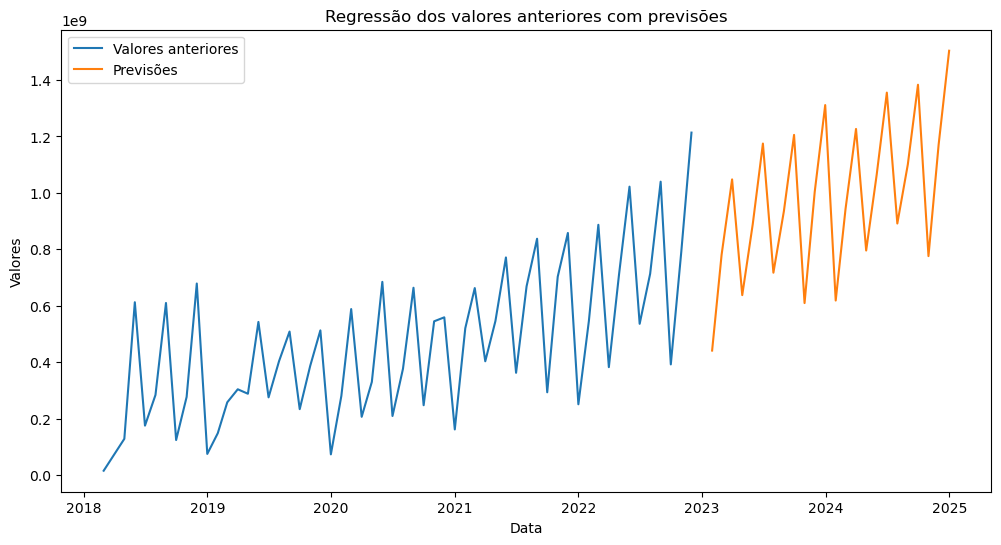

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(df_prophet.index, df_prophet['valor'], label='Valores anteriores')
plt.plot(df_previsao.index, df_previsao['previsao'], label='Previsões')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.title('Regressão dos valores anteriores com previsões')
plt.legend()
plt.show()